Department of Physics, University of Pisa (AA 2023-2024)

### Multimessenger Physics Laboratory tutorial series



# Tutorial 01 - Read Monochromatic CCD or CMOS Images
#### (M. Razzano, Mar 12, 2024)

In this tutorial we will see how to read images produced by a monochromatic CCD or CMOS. We will also see how to manipulate them, e.g. to see histograms, and combine them.

## Basic Setup 

### Importing packages
First of all, we import the relevant Python packages

In [13]:
#first, do some basic imports
import numpy as np
import os

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

#Astropy import
from astropy.nddata import CCDData
from astropy.io import fits

#ccdproc import
import ccdproc

### Definion of relevant directories
We can define these directories:
* work_dir: the *working directory*, where the notebook is;
* main_dir: the *main directory* of the project;
* data_dir: the *data directory* containing the data

In [14]:
#define Work dir
work_dir = os.getcwd()

#Main Dir
main_dir = os.path.dirname(work_dir)

#Data Dir
data_dir = os.path.join(main_dir,"testdata")

print("Main directory is %s" % main_dir)
print("Data directory is %s" % data_dir)

Main directory is /home/jovyan/experience-ccd-optical-template
Data directory is /home/jovyan/experience-ccd-optical-template/testdata


## Read Monochromatic images
This is the case of the images produced by monochromatic CCDs. The data is stored in a NxM matrix, each element containing the ADUs of a pixel.

### Display Header with Astropy
We can now display the header using *Astropy*

In [15]:
#Explore the structure of the FITS file
single_ccd_exposure_filename = "M44Light_20s_atik460.fits"

hdu_list = fits.open(os.path.join(data_dir,single_ccd_exposure_filename))
hdu_list.info()

Filename: /home/jovyan/experience-ccd-optical-template/testdata/M44Light_20s_atik460.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (2749, 2199)   int16 (rescales to uint16)   


In [16]:
header = fits.getheader(os.path.join(data_dir,single_ccd_exposure_filename),0)

print("Print header with Astropy:")
print(header)

Print header with Astropy:
SIMPLE  =                    T                                                  BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                 2749                                                  NAXIS2  =                 2199                                                  BSCALE  =                    1                                                  BZERO   =                32768                                                  XPIXSZ  = '4,53999996185303'                                                    YPIXSZ  = '4,53999996185303'                                                    XBINNING=                    1                                                  YBINNING=                    1                                                  EXPTIME =                   20                                                  ISCOLOUR=    

### Display Header with CCDproc
We can now open the file and display the header using *CCDproc*. The result is easier to read.


In [17]:
single_ccd_frame = CCDData.read(os.path.join(data_dir,single_ccd_exposure_filename),hdu=0,unit="adu")

In [18]:
print("Print header with CCDProc:")

print(single_ccd_frame.header)

Print header with CCDProc:
SIMPLE  =                    T                                                  BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                 2749                                                  NAXIS2  =                 2199                                                  BSCALE  =                    1                                                  BZERO   =                32768                                                  XPIXSZ  = '4,53999996185303'                                                    YPIXSZ  = '4,53999996185303'                                                    XBINNING=                    1                                                  YBINNING=                    1                                                  EXPTIME =                   20                                                  ISCOLOUR=    

In [19]:
#Print data content
single_ccd_frame.data

array([[1175, 1142, 1113, ..., 1022, 1031, 1084],
       [1097, 1093, 1097, ..., 1058, 1020, 1018],
       [1072, 1210, 1204, ...,  988, 1076, 1022],
       ...,
       [1262, 1207, 1130, ..., 1109, 1137, 1156],
       [1229, 1203, 1236, ..., 1114, 1052, 1223],
       [1172, 1235, 1225, ..., 1187, 1233, 1096]], dtype=uint16)

In [20]:
print("Shape of data array is:")
single_ccd_frame.data.shape

Shape of data array is:


(2199, 2749)

## Display image and histogram of a single color
We can now select a color, e.g. red and display the frame image, the histogram and evaluate the statistics

Text(0.5, 0.95, 'min=767.00\nmax=65535.00\nmean=1338.36\nmedian=1336.00\nstd=580.18')

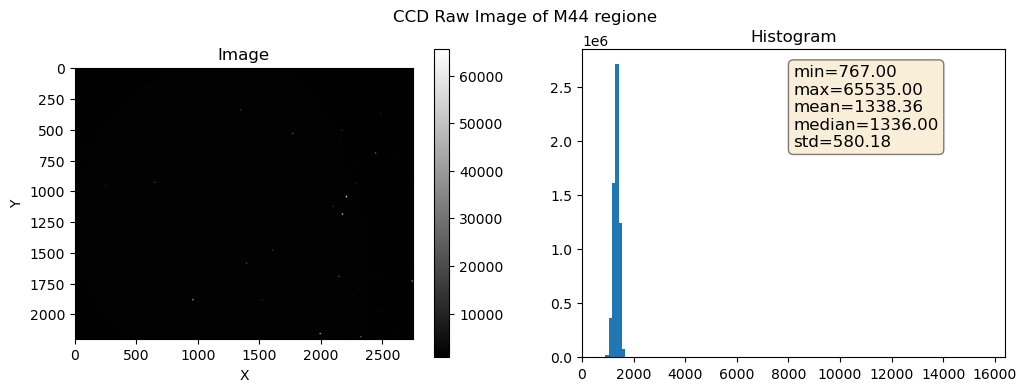

In [21]:
#Create an array of subplots

r_fig = plt.figure("CCD",figsize=(12,4))
r_fig.suptitle("CCD Raw Image of M44 regione")

#Display image
r_ax1 = plt.subplot(1, 2, 1)
r_ax1.set_title("Image")
r_ax1.set_xlabel("X")
r_ax1.set_ylabel("Y")

r_img = r_ax1.imshow(single_ccd_frame.data, cmap='gray')
plt.colorbar(r_img)

#Display histogram of image counts
r_ax2 = plt.subplot(1, 2, 2)
r_ax2.set_title("Histogram")
r_ax2.hist(single_ccd_frame.data.flatten(),bins=500)
r_ax2.set_xlim([0,2**14])

#Get some statistics
r_min = np.min(single_ccd_frame.data)
r_max = np.max(single_ccd_frame.data)
r_mean = np.mean(single_ccd_frame.data)
r_std = np.std(single_ccd_frame.data)
r_median = np.median(single_ccd_frame.data)

#Place in a text box
r_text = '\n'.join((
    r'min=%.2f' % (r_min, ),
    r'max=%.2f' % (r_max, ),
    r'mean=%.2f' % (r_mean, ),
    r'median=%.2f' % (r_median, ),
    r'std=%.2f' % (r_std, )))


#Place the text box in upper left (using axes coordinates)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
r_ax2.text(0.5, 0.95, r_text, transform=r_ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

### Change Display normalization 
Sometime the image can be hard to see in its details, therefore changing to logaritmic color scale can help

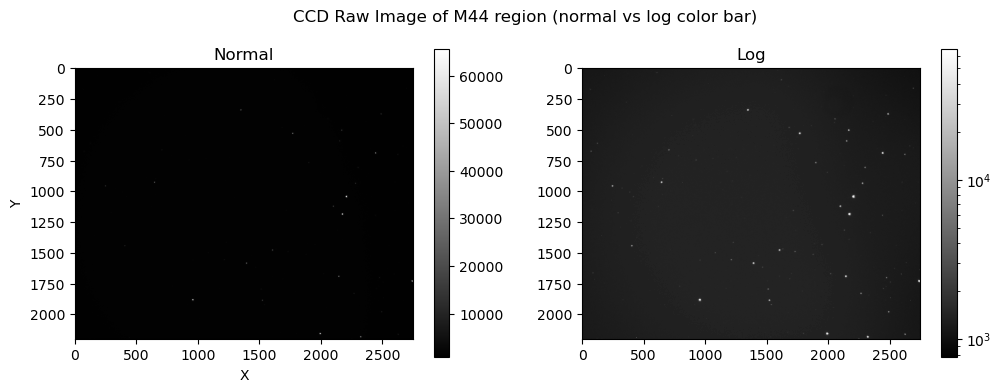

In [22]:
from matplotlib.colors import LogNorm

#Create an array of subplots

l_fig = plt.figure("CCDLogNorm",figsize=(12,4))
l_fig.suptitle("CCD Raw Image of M44 region (normal vs log color bar)")

#Display image
l_ax1 = plt.subplot(1, 2, 1)
l_ax1.set_title("Normal")
l_ax1.set_xlabel("X")
l_ax1.set_ylabel("Y")

l_img = l_ax1.imshow(single_ccd_frame.data, cmap='gray')
plt.colorbar(l_img)

#Display histogram of image counts
l_ax2 = plt.subplot(1, 2, 2)
l_ax2.set_title("Log")

l_img = l_ax2.imshow(single_ccd_frame.data, cmap='gray', norm=LogNorm())
plt.colorbar(l_img)